In [12]:
import sys
sys.path.insert(0, '../tracing_analysis')
import navis
import pymaid
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 # Formatting for editable pdf text
matplotlib.rcParams['font.sans-serif']=['Arial']
import numpy as np
import seaborn as sns
import importlib
import pandas as pd
import pickle
from scipy import stats as stats

import analysis_dataframes as myDF
import ppc_analysis_functions.catmaid_API as cAPI
import ppc_analysis_functions.figure_plotting as figs
importlib.reload(figs)
# connect to pymaid instance
rm = pymaid.CatmaidInstance('http://catmaid3.hms.harvard.edu/catmaidppc',
      api_token='9afd2769efa5374b8d48cb5c52af75218784e1ff', project_id=1)
labels = pymaid.get_label_list()

cwd = os.getcwd()
figsDir = os.sep.join([cwd,'fig_panels/'])
workingDir = os.sep.join([os.path.dirname(cwd), 'analysis_dataframes/'])

# Define LR colormap and make colorbar
#pal = {'anti':'#C79BCF', 'co':'#5CB8A4'} # lighter
pal = {'anti':'#ba48cf', 'co':'#2CB899'} # darker
order = ['anti','co']

MannwhitneyuResult(statistic=75.0, pvalue=0.0183547103051747)
Same: n=15,  0.045 +- 0.005
Opp: n=6, 0.021 +- 0.006


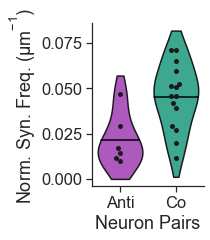

In [5]:
# Fig. 2c: Compare PPC E2I syn density for same/opp pairs 
with open(workingDir+'dir_cn_DF_PPC.pkl', 'rb') as f:  
    dir_cn_DF= pickle.load(f)

sns.set(rc={'figure.figsize':(2,3)}, font_scale=1.5, style='ticks')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
plt.subplots_adjust(hspace = .4, wspace=0.8)

E2I_cn_DF = dir_cn_DF[dir_cn_DF.cn_type == 'E-I']
metric = 'pair_select_idx_new'
E2I_cn_DF['pair_select_sign'] = ['co' if sidx > 0 else 'anti' for sidx in E2I_cn_DF[metric]]

ax = sns.swarmplot(data=E2I_cn_DF, x='pair_select_sign', y='syn_den', color = 'k',order = order)
figs.my_violinplot(data=E2I_cn_DF, x='pair_select_sign', y='syn_den', inner='quartiles', order = order, cut=1, palette=pal, scale='width', ax=ax)

ax.set_ylabel('Norm. Syn. Freq. (µm$^{-1}$)')
ax.set_xlabel('Neuron Pairs')
ax.set_xticklabels(['Anti', 'Co'])

my_cn_DF = E2I_cn_DF
same = my_cn_DF[my_cn_DF[metric]>0].syn_den.values
opp = my_cn_DF[my_cn_DF[metric]<0].syn_den.values
#print(stats.ttest_ind(same, opp))
print(stats.mannwhitneyu(same, opp))
print('Same: n=%i,  %.03f +- %.03f' % (len(same), np.mean(same), stats.sem(same)))
print('Opp: n=%i, %.03f +- %.03f' % (len(opp), np.mean(opp), stats.sem(opp)))
sns.despine()
plt.savefig(figsDir+'syn_density_vs_SameOpp_violin.pdf',bbox_inches='tight')


In [6]:
# Example data points for syn freq
E2I_cn_DF_ex = {}
E2I_cn_DF_ex['Same'] = E2I_cn_DF[np.logical_and(E2I_cn_DF.source==143896,E2I_cn_DF.target==141681)]
E2I_cn_DF_ex['Non'] = E2I_cn_DF[np.logical_and(E2I_cn_DF.source== 144141,E2I_cn_DF.target==24051)]
E2I_cn_DF_ex['Opp'] = E2I_cn_DF[np.logical_and(E2I_cn_DF.source==143494,E2I_cn_DF.target==8357)]
# synapse examples: same. 17169794   non.  17946438 opp.   1282827

print(E2I_cn_DF_ex['Opp'][['source','target','syn_count','cable_overlap','syn_den','pair_select_idx_new','cn_ids']])
print(E2I_cn_DF_ex['Non'][['source','target','syn_count','cable_overlap','syn_den','pair_select_idx_new','cn_ids']])
print(E2I_cn_DF_ex['Same'][['source','target','syn_count','cable_overlap','syn_den','pair_select_idx_new','cn_ids']])

     source  target  syn_count  cable_overlap   syn_den  pair_select_idx_new  \
124  143494    8357          1     100.873055  0.009913            -0.097472   

        cn_ids  
124  [1282827]  
     source  target  syn_count  cable_overlap   syn_den  pair_select_idx_new  \
112  144141   24051          1      34.602891  0.028899             0.016108   

         cn_ids  
112  [18128552]  
    source  target  syn_count  cable_overlap   syn_den  pair_select_idx_new  \
47  143896  141681          2      28.132574  0.071092             0.150792   

                  cn_ids  
47  [17169791, 17169794]  


Ttest_indResult(statistic=1.7800177977680605, pvalue=0.08633148015804365)
MannwhitneyuResult(statistic=125.0, pvalue=0.04657018809942348)
Same: n=21,  0.222 +- 0.032
Opp: n=8, 0.124 +- 0.025


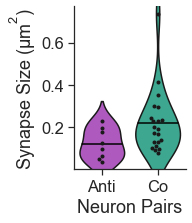

In [7]:
# Fig. 2d: Compare same/opp for PPC E2I psd area
with open(workingDir+'dir_syn_DF_PPC.pkl', 'rb') as f:  
    dir_syn_DF= pickle.load(f)
#pal = {-1:'#ba48cf', 1:'#2CB899'}
sns.set(rc={'figure.figsize':(2,3)}, font_scale=1.5, style='ticks')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
plt.subplots_adjust(hspace = .4, wspace=0.8)

metric = 'pair_select_idx_new'
E2I_syn_DF = dir_syn_DF[dir_syn_DF.cn_type == 'E-I']
E2I_syn_DF['pair_select_sign'] = ['co' if sidx > 0 else 'anti' for sidx in E2I_syn_DF[metric]]
#np.sign(E2I_syn_DF.pair_select_idx)

ax = figs.my_violinplot(data=E2I_syn_DF, x='pair_select_sign', y='psd_area',  inner='quartiles',cut=2, palette=pal, scale='width', order=order)
sns.swarmplot(data=E2I_syn_DF, x='pair_select_sign', y='psd_area', color = 'k',ax=ax, order=order, s=4)
ax.set_ylabel('Synapse Size (µm$^2$)')
ax.set_xlabel('Neuron Pairs')
ax.set_xticklabels(['Anti', 'Co'])

my_syn_DF = E2I_syn_DF
same = my_syn_DF[my_syn_DF.pair_select_sign=='co'].psd_area.values
opp = my_syn_DF[my_syn_DF.pair_select_sign=='anti'].psd_area.values
print(stats.ttest_ind(same, opp))
print(stats.mannwhitneyu(same, opp,alternative='two-sided'))
print('Same: n=%i,  %.03f +- %.03f' % (len(same), np.mean(same), stats.sem(same)))
print('Opp: n=%i, %.03f +- %.03f' % (len(opp), np.mean(opp), stats.sem(opp)))
sns.despine()

plt.savefig(figsDir+'psd_area_vs_SameOpp_violin.pdf',bbox_inches='tight')

In [8]:
# Example data points for psd area
E2I_syn_DF_ex = {}
E2I_syn_DF_ex['Same'] = E2I_syn_DF[np.logical_and(E2I_syn_DF.source==143896,E2I_syn_DF.target==141681)]
E2I_syn_DF_ex['Non'] = E2I_syn_DF[np.logical_and(E2I_syn_DF.source== 144141,E2I_syn_DF.target==24051)]
E2I_syn_DF_ex['Opp'] = E2I_syn_DF[np.logical_and(E2I_syn_DF.source==143494,E2I_syn_DF.target==8357)]
# synapse examples: same. 17169794   non.  17946438 opp.   1282827

print(E2I_syn_DF_ex['Opp'][['source','target','psd_area','pair_select_idx_new','connector_id']])
print(E2I_syn_DF_ex['Non'][['source','target','psd_area','pair_select_idx_new','connector_id']])
print(E2I_syn_DF_ex['Same'][['source','target','psd_area','pair_select_idx_new','connector_id']])

     source  target  psd_area  pair_select_idx_new  connector_id
149  143494    8357  0.037778            -0.097472       1282827
     source  target  psd_area  pair_select_idx_new  connector_id
197  144141   24051  0.103862             0.016108      18128552
    source  target  psd_area  pair_select_idx_new  connector_id
23  143896  141681  0.414702             0.150792      17169791
27  143896  141681  0.736012             0.150792      17169794


In [9]:
# Fig. 2e,f,g plot example pairs 
# find view interactively and screenshot
pairs = 'same' # Toggle
importlib.reload(figs)
if pairs == 'same':
    mySkids = [143896,141681]
elif pairs == 'opp':
    mySkids = [143494,8357]
elif pairs == 'non':
    mySkids = [144141,24051] 

with open(workingDir+'MN_DF_PPC.pkl' , 'rb') as f:  
    MN_DF_PPC = pickle.load(f)
with open(workingDir+'dir_cn_DF_PPC.pkl', 'rb') as f:  
    dir_cn_DF= pickle.load(f)
sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5)
view=('-z','-y')
ax = None

my_cn_DF = dir_cn_DF[np.logical_and(dir_cn_DF.source==mySkids[0], dir_cn_DF.target==mySkids[1])]
print('Source SI: %0.2f Target SI: %0.2f Pair SI: %0.2f' % (my_cn_DF.source_select_idx, my_cn_DF.target_select_idx, my_cn_DF.pair_select_idx))
print((figs.RL_colormap(my_cn_DF.source_select_idx), figs.RL_colormap(my_cn_DF.target_select_idx)))
print((figs.pair_colormap(my_cn_DF.pair_select_idx)))
print('%i connections with %0.2f overlap = %0.3f syn den' % (my_cn_DF.syn_count, my_cn_DF.cable_overlap, my_cn_DF.syn_den))
n1 = pymaid.get_neuron(mySkids[0])
n2 = pymaid.get_neuron(mySkids[1])
figs.plot_cn_pair_3d_new(n1, my_cn_DF.source_select_idx,n2, my_cn_DF.target_select_idx,labels)

Source SI: 0.26 Target SI: 0.09 Pair SI: 0.15
(['#ff4242'], ['#e47171'])
['#50bda5']
2 connections with 28.13 overlap = 0.071 syn den
end is myelinated for neuron 143896 (code needs update)


Smoothing:   0%|          | 0/9 [00:00<?, ?it/s]

Smoothing:   0%|          | 0/19 [00:00<?, ?it/s]

Smoothing:   0%|          | 0/24 [00:00<?, ?it/s]

Smoothing:   0%|          | 0/24 [00:00<?, ?it/s]

cable overlap is 26559.171875


Data corr = 0.654
t-test p = 0.001
(0.6536122740711457, 0.0013120747780631335)


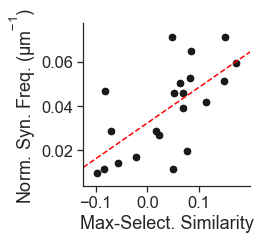

In [10]:
# Fig. 2h: PPC E2I syn density vs pair_select_idx, PPC
with open(workingDir+'dir_cn_DF_PPC.pkl', 'rb') as f:  
    dir_cn_DF= pickle.load(f)

sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5, style='ticks')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
#f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2.4, 0.4]})
f, ax0 = plt.subplots(1, 1)
#plt.subplots_adjust(hspace = .4, wspace=0.8)

E2I_cn_DF = dir_cn_DF[dir_cn_DF.cn_type == 'E-I']
metric = 'pair_select_idx_new'
E2I_cn_DF.dropna(subset=['syn_den',metric], inplace=True)

(c,p) = figs.scatter(E2I_cn_DF, x=metric, y='syn_den', color='k',sig_test='pearson',s=50, ax=ax0)
print('Data corr = %.3f' % c)
print('t-test p = %.3f' % p)

ax0.set_xlabel('Max-Select. Similarity')
ax0.set_ylabel('Norm. Syn. Freq. (µm$^{-1}$)')

#(shuf_df, scores) = figs.calc_shuffle_comparisons_new(E2I_cn_DF, x=metric, y='syn_den',
#    sig_test='pearson', n_shuf=100)
#figs.my_violinplot(data = shuf_df[shuf_df['shuf'].isin(['shuf'])], x='shuf', y='corrs', ci='sd', order = ['shuf'], 
#    palette = ['white'], cut=2, scale='width', ax=ax1)
#ax1.axhline(y=c, color='red', linestyle='-', linewidth=2)
#ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
#ax1.set_ylabel('Corr. Coef.')
#ax1.set_xticks([])
#ax1.set_xlabel('')

sns.despine()
#ax1.spines['bottom'].set_visible(False)

print(stats.pearsonr(E2I_cn_DF[metric], E2I_cn_DF['syn_den']))
plt.savefig(figsDir+'E2I_syn_den_vs_choice_sim_PPC.pdf',bbox_inches='tight')

zoom level = 0
[1126560.0, 1128160.0, 401192.0, 402792.0, 59960.0]


Stitching:   0%|          | 0/1 [00:00<?, ?it/s]

Loading tiles:   0%|          | 0/2 [00:00<?, ?it/s]

I range is 0 255
PSD area is 0.1039


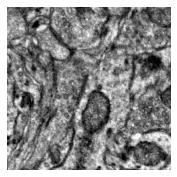

In [13]:
# Export example synapses 
with open(workingDir+'dir_syn_DF_PPC.pkl', 'rb') as f:  
    dir_syn_DF= pickle.load(f)

pairs = 'non' # Toggle
importlib.reload(figs)
if pairs == 'same':
    mySkids = [h ,141681] # Same
elif pairs == 'opp':
    mySkids = [143494,8357] # Opp
elif pairs == 'non':
    mySkids = [144141,24051] # Non

E2I_syn_DF = dir_syn_DF[dir_syn_DF.cn_type == 'E-I']
center = np.array(pymaid.get_connectors_between(mySkids[0], mySkids[1]).connector_loc[0])

img = figs.plot_syn_EM(center, dx = 1600, z_nudge=1, lower=20, upper=240)
my_syn = E2I_syn_DF[E2I_syn_DF.source == mySkids[0]]
my_syn = my_syn[my_syn.target==mySkids[1]]
if len(my_syn) > 1:
    print('PSD area is %0.4f' % my_syn.psd_area.values[1])
else:
    print('PSD area is %0.4f' % my_syn.psd_area.values)
#plt.savefig(figsDir + 'psd_ex_'+pairs+'.jpeg', bbox_inches='tight', pad_inches = 0, dpi=300)

Data corr = 0.561
t-test p = 0.002


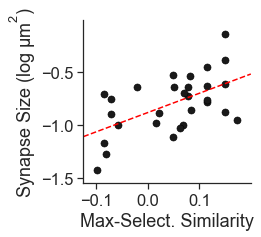

In [14]:
# Fig. 2l: E2I psd area vs pair_select_idx
with open(workingDir+'dir_syn_DF_PPC.pkl', 'rb') as f:  
    dir_syn_DF= pickle.load(f)
E2I_syn_DF = dir_syn_DF[dir_syn_DF.cn_type == 'E-I']

sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5, style='ticks')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
#f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2.4, 0.4]})
f, ax0 = plt.subplots(1, 1)
plt.subplots_adjust(hspace = .4, wspace=0.8)

metric = 'pair_select_idx_new'
(c,p)=figs.scatter(E2I_syn_DF, x=metric, y='log_psd_area',sig_test='pearson',color= 'k',s=50, ax=ax0)
print('Data corr = %.3f' % c)
print('t-test p = %.3f' % p)
ax0.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#ax0.set_yscale('log')
ax0.set_xlabel('Max-Select. Similarity')
ax0.set_ylabel('Synapse Size (log µm$^2$)')
#ax0.set_ylim([10**-1.5, 10**0])
ax0.get_legend().remove()

sns.despine()
dataset='PPC'
plt.savefig(figsDir+'E2I_psd_area_vs_choice_sim_'+dataset+'.pdf',bbox_inches='tight')